In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('data.csv')

In [18]:
data = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud','isFlaggedFraud']]
data.sample(10)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1118710,133969.96,0.00,0.00,298996.92,432966.88,0,0
3850172,146188.47,10292.00,0.00,0.00,146188.47,0,0
3452404,157335.40,3159997.66,3317333.06,309847.25,152511.84,0,0
75037,10134.71,38731.00,28596.29,0.00,0.00,0,0
1878131,191966.25,31467.00,223433.25,0.00,0.00,0,0
2826118,26426.95,5352.00,0.00,0.00,0.00,0,0
5552585,38401.40,0.00,0.00,0.00,0.00,0,0
4997308,236034.44,5584.00,0.00,0.00,236034.44,0,0
4873531,96002.00,30384.00,0.00,310256.41,406258.41,0,0
385983,3390.08,0.00,0.00,0.00,0.00,0,0


In [19]:
data.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: xlabel='isFraud'>

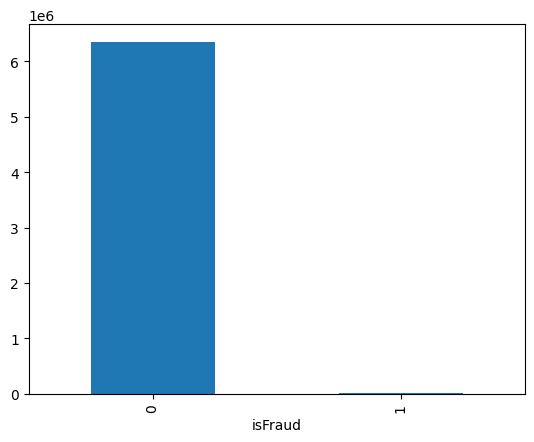

In [24]:
data['isFraud'].value_counts().plot(kind='bar')

In [26]:
x = data.drop('isFraud',axis=1)
y = data['isFraud']
x.shape, y.shape

((6362620, 6), (6362620,))

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [44]:
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(solver='liblinear',class_weight='balanced') = 0.96126
#model = LogisticRegression(solver='saga',class_weight='balanced') = 0.6735
model = LogisticRegression(solver='liblinear') #= 0.9992
classifier = model.fit(x_train,y_train)


c:\Users\Deepak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [45]:
y_predict = classifier.predict(x_test)

In [46]:
result = pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})
result.sample(10)

,Actual,Predicted
4062798,0,0
5515346,0,0
491397,0,0
4429555,0,0
5371498,0,0
3105842,0,0
4482778,0,0
2934078,0,0
1443547,0,0
4291028,0,0


In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.9992524044078278


In [48]:
y_train_pred = classifier.predict(x_train)
print(accuracy_score(y_train, y_train_pred))

0.9992803952729267


In [51]:
y_test_prob = classifier.predict_proba(x_test)
y_test_prob[:5,:]

array([[9.90914469e-01, 9.08553137e-03],
       [5.78209055e-01, 4.21790945e-01],
       [6.83086498e-01, 3.16913502e-01],
       [9.99999508e-01, 4.91585074e-07],
       [9.99693434e-01, 3.06566183e-04]])

In [53]:
array_in_scientific = y_test_prob[:5,:]
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)
array_in_normal

array([['0.9909144686275800', '0.0090855313724200'],
       ['0.5782090546721556', '0.4217909453278444'],
       ['0.6830864978323230', '0.3169135021676771'],
       ['0.9999995084149257', '0.0000004915850743'],
       ['0.9996934338165349', '0.0003065661834651']], dtype='<U18')

In [58]:
T = y_test_prob[:,1]
array_in_one = T
s = np.vectorize(lambda x:format(x,'.16f'))(array_in_one)
s

array(['0.0090855313724200', '0.4217909453278444', '0.3169135021676771',
       ..., '0.0000000000000000', '0.0000000000000000',
       '0.3897303181791956'], dtype='<U18')

In [60]:
result = pd.DataFrame({'Actual':y_test,'Predictions':y_predict,'Prob':s})
result.sample(10)

,Actual,Predictions,Prob
5595507,0,0,0.2571281866711488
1133131,0,0,0.0000000000000000
5885617,0,0,0.0000000000000000
5847456,0,0,0.4914426349101338
3847514,0,0,0.2469495229569772
2670755,0,0,0.0000000000000001
516246,0,0,0.0000000182384206
2850506,0,0,0.4631736194042690
3624938,0,0,0.0208656272904348
455239,0,0,0.0000000000004380


In [61]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[1905716     602]
 [    825    1643]]


Text(95.72222222222221, 0.5, 'Actual')

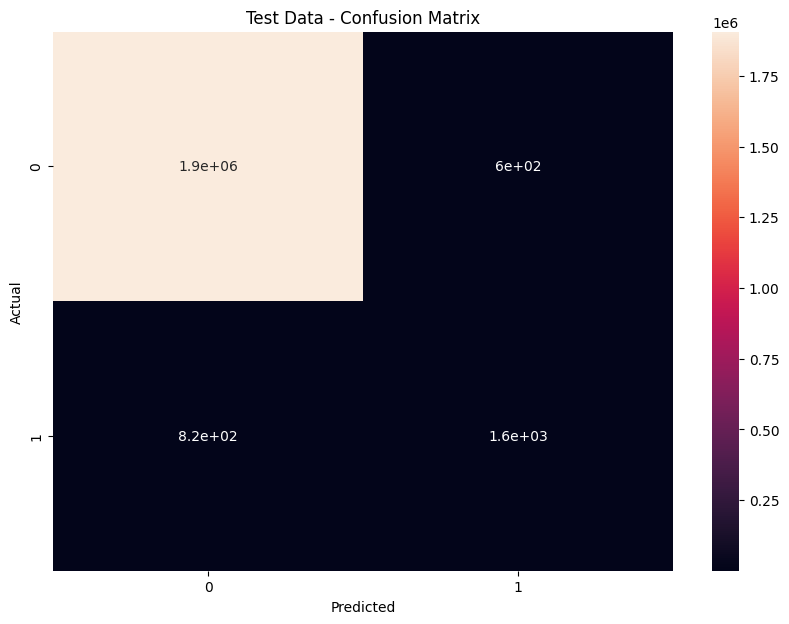

In [62]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.title('Test Data - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

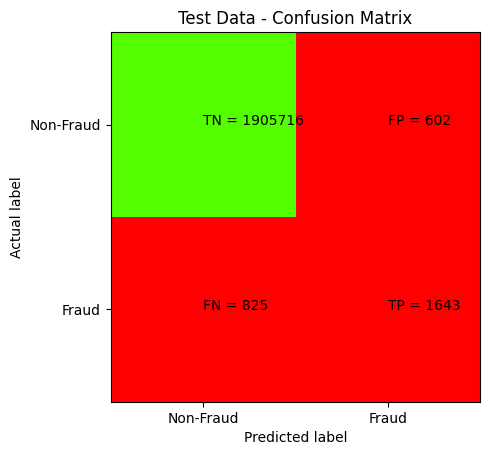

In [65]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.prism)
classNames = ['Non-Fraud','Fraud']
plt.title('Test Data - Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.73      0.67      0.70      2468

    accuracy                           1.00   1908786
   macro avg       0.87      0.83      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



In [68]:
TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
recall = TP/(TP+FN)
precision = TP/(TP+FP) 
print('Recall: ',recall)
print('Precision: ',precision)

Recall:  0.6657212317666127
Precision:  0.7318485523385301


In [69]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(classifier,f)